In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

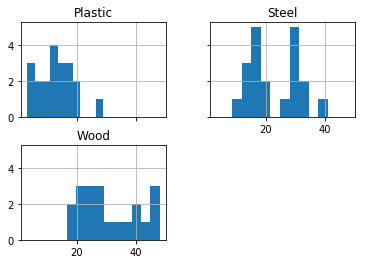

In [2]:
coaster_heights = pd.DataFrame()

steel_heights = [
    18.5, 14, 30.2, 25.2024, 15, 16, 13.5, 30, 20, 17, 13.716, 8.5, 16.1, 18,
    41, 30.3, 32.004, 28.004, 30.48, 34
    ]

wood_heights = [
    38.70, 46, 27.8, 43.52, 33.77, 29.26, 16.764, 45, 48.1, 16.764, 24.384,
    24.5, 40, 35.96, 22.24, 21.33, 27.73, 23.46, 21.64, 30.12
    ]

plastic_heights = [
    9, 8.2, 12, 21, 6.3, 11.7, 19.44, 4.75, 13, 18, 15.5, 15.6, 10, 11.77, 29,
    5, 3.2, 14.75, 18.2, 17.7
    ]

coaster_heights['Steel'] = steel_heights
coaster_heights['Wood'] = wood_heights
coaster_heights['Plastic'] = plastic_heights

coaster_heights.hist(sharey=True,sharex=True)
plt.show()

Steel      22.57532
Wood       30.85210
Plastic    13.20550
dtype: float64


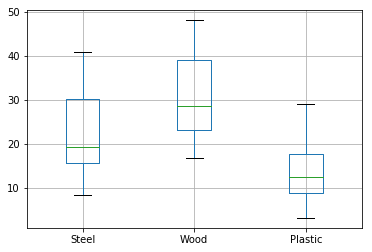

21.515815855142634
1.0927449918229045e-07


In [3]:
print(coaster_heights.mean())

coaster_heights.boxplot()
plt.show()


F, p = stats.f_oneway(
    coaster_heights['Steel'],
    coaster_heights['Wood'],
    coaster_heights['Plastic'])

print(F)
print(p)

In [4]:
print(stats.ttest_ind(coaster_heights['Steel'], coaster_heights['Wood']))
print(stats.ttest_ind(coaster_heights['Steel'], coaster_heights['Plastic']))
print(stats.ttest_ind(coaster_heights['Plastic'], coaster_heights['Wood']))

Ttest_indResult(statistic=-2.785911485728798, pvalue=0.008281657085474181)
Ttest_indResult(statistic=3.8446067874474887, pvalue=0.00044650642104150624)
Ttest_indResult(statistic=-6.683437837231596, pvalue=6.614422528990009e-08)


In [5]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [6]:
coaster_heights = pd.DataFrame()

steel_heights = [
    18.5, 14, 30.2, 25.2024, 15, 16, 13.5, 30, 20, 17, 13.716, 8.5, 16.1, 18,
    41, 30.3, 32.004, 28.004, 30.48, 34
    ]

wood_heights = [
    38.70, 46, 27.8, 43.52, 33.77, 29.26, 16.764, 45, 48.1, 16.764, 24.384,
    24.5, 40, 35.96, 22.24, 21.33, 27.73, 23.46, 21.64, 30.12
    ]

plastic_heights = [
    9, 8.2, 12, 21, 6.3, 11.7, 19.44, 4.75, 13, 18, 15.5, 15.6, 10, 11.77, 29,
    5, 3.2, 14.75, 18.2, 17.7
    ]

coaster_heights['Steel'] = steel_heights
coaster_heights['Wood'] = wood_heights
coaster_heights['Plastic'] = plastic_heights

heights=np.asarray(
    coaster_heights['Steel'].tolist() +
    coaster_heights['Wood'].tolist() +
    coaster_heights['Plastic'].tolist())

materials = np.array(['Steel', 'Wood','Plastic'])
materials = np.repeat(materials, 20)

tukey = pairwise_tukeyhsd(endog=heights,      
                          groups=materials,   
                          alpha=0.05)         

tukey.summary()  

group1,group2,meandiff,lower,upper,reject
Plastic,Steel,9.3698,2.8923,15.8474,True
Plastic,Wood,17.6466,11.1691,24.1241,True
Steel,Wood,8.2768,1.7992,14.7543,True
